In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
print(os.listdir("/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data"))

['train_data', 'test_data']


In [11]:
card_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/cardboard'
glass_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/glass'
metal_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/metal'
paper_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/paper'
plastic_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/plastic'
trash_dir = '/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/trash'

print('Total training cardboard images:', len(os.listdir(card_dir)))
print('Total training glass images:', len(os.listdir(glass_dir)))
print('Total training metal images:', len(os.listdir(metal_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training plastic images:', len(os.listdir(plastic_dir)))
print('Total training trash images:', len(os.listdir(trash_dir)))

cardboard_files = os.listdir(card_dir)
print(cardboard_files[:10])

glass_files = os.listdir(glass_dir)
print(glass_files[:10])

metal_files = os.listdir(metal_dir)
print(metal_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

plastic_files = os.listdir(plastic_dir)
print(plastic_files[:10])

trash_files = os.listdir(trash_dir)
print(trash_files[:10])

Total training cardboard images: 403
Total training glass images: 501
Total training metal images: 410
Total training paper images: 594
Total training plastic images: 482
Total training trash images: 137
['cardboard140.jpg', 'cardboard362.jpg', 'cardboard205.jpg', 'cardboard180.jpg', 'cardboard300.jpg', 'cardboard132.jpg', 'cardboard378.jpg', 'cardboard403.jpg', 'cardboard134.jpg', 'cardboard119.jpg']
['glass13.jpg', 'glass453.jpg', 'glass412.jpg', 'glass441.jpg', 'glass247.jpg', 'glass74.jpg', 'glass71.jpg', 'glass465.jpg', 'glass294.jpg', 'glass244.jpg']
['metal283.jpg', 'metal87.jpg', 'metal378.jpg', 'metal197.jpg', 'metal329.jpg', 'metal162.jpg', 'metal253.jpg', 'metal37.jpg', 'metal261.jpg', 'metal5.jpg']
['paper459.jpg', 'paper346.jpg', 'paper474.jpg', 'paper200.jpg', 'paper52.jpg', 'paper567.jpg', 'paper480.jpg', 'paper206.jpg', 'paper302.jpg', 'paper115.jpg']
['plastic141.jpg', 'plastic300.jpg', 'plastic242.jpg', 'plastic475.jpg', 'plastic225.jpg', 'plastic7.jpg', 'plastic22.jp

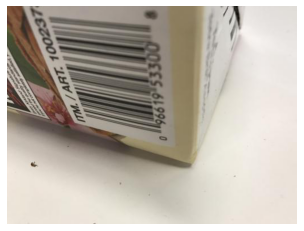

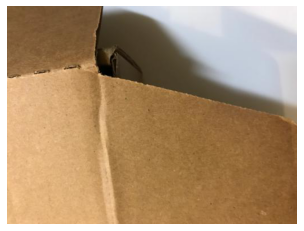

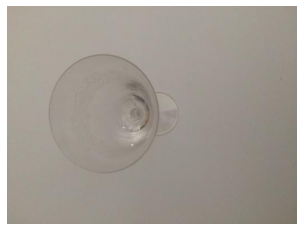

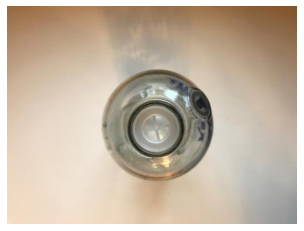

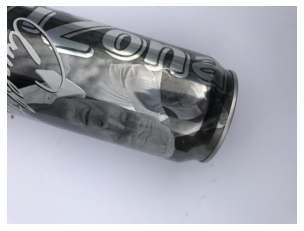

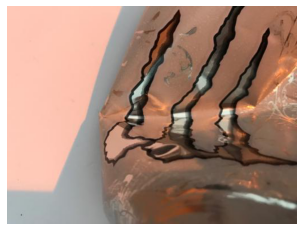

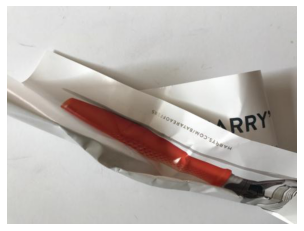

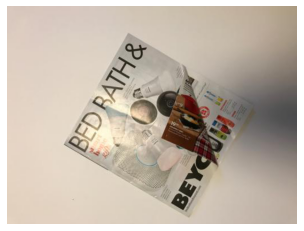

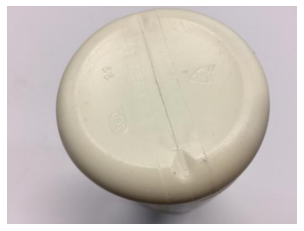

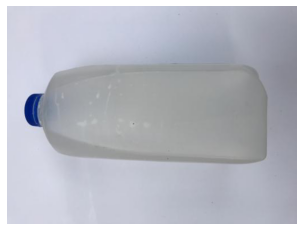

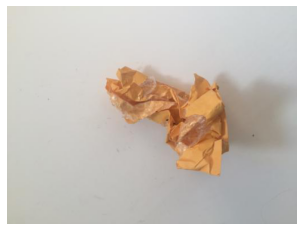

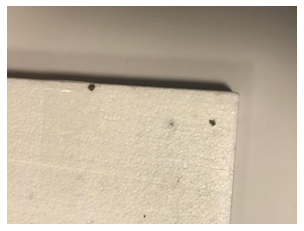

In [12]:
pic_index = 2

next_cardboard = [os.path.join(card_dir, fname) 
                for fname in cardboard_files[pic_index-2:pic_index]]
next_glass = [os.path.join(glass_dir, fname) 
                for fname in glass_files[pic_index-2:pic_index]]
next_metal = [os.path.join(metal_dir, fname) 
                for fname in metal_files[pic_index-2:pic_index]]
next_paper= [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_plastic = [os.path.join(plastic_dir, fname) 
                for fname in plastic_files[pic_index-2:pic_index]]
next_trash = [os.path.join(trash_dir, fname) 
                for fname in trash_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_cardboard+next_glass+next_metal+next_paper+next_plastic+next_trash):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [13]:
TRAINING_DIR = "/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/train_data/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/data/test_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.
Found 104 images belonging to 6 classes.


In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
history = model.fit_generator(train_generator, epochs=100, validation_data = validation_generator, verbose = 1)

model.save("/home/raghav/Downloads/waste_management_Datasets/Rubbish_classification/models/rps.h5")

Epoch 1/100
79/79 [==============================] - 16s 203ms/step - loss: 0.8140 - accuracy: 0.7111 - val_loss: 0.8711 - val_accuracy: 0.6538
Epoch 2/100
79/79 [==============================] - 16s 198ms/step - loss: 0.8346 - accuracy: 0.7206 - val_loss: 0.7819 - val_accuracy: 0.7212
Epoch 3/100
79/79 [==============================] - 15s 191ms/step - loss: 0.7996 - accuracy: 0.7206 - val_loss: 0.6639 - val_accuracy: 0.7692
Epoch 4/100
79/79 [==============================] - 15s 190ms/step - loss: 0.7794 - accuracy: 0.7238 - val_loss: 0.6402 - val_accuracy: 0.7500
Epoch 5/100
79/79 [==============================] - 15s 192ms/step - loss: 0.7756 - accuracy: 0.7186 - val_loss: 0.7297 - val_accuracy: 0.7596
Epoch 6/100
79/79 [==============================] - 15s 193ms/step - loss: 0.7742 - accuracy: 0.7345 - val_loss: 0.8705 - val_accuracy: 0.6538
Epoch 7/100
79/79 [==============================] - 15s 193ms/step - loss: 0.7438 - accuracy: 0.7558 - val_loss: 0.5822 - val_accuracy: